Started with chapter 10. Some references were there in chapter 14

**Perceptron**
![perceptron](images/prashant/perceptron.png)

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
# selected column 2 & 3
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(np.int)  # Iris setosa?

per_clf = Perceptron()
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

In [2]:
print(per_clf.predict([[4, 2.5]]))

[0]


In [3]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [4]:
iris.data[:,0:3]

array([[5.1, 3.5, 1.4],
       [4.9, 3. , 1.4],
       [4.7, 3.2, 1.3],
       [4.6, 3.1, 1.5],
       [5. , 3.6, 1.4],
       [5.4, 3.9, 1.7],
       [4.6, 3.4, 1.4],
       [5. , 3.4, 1.5],
       [4.4, 2.9, 1.4],
       [4.9, 3.1, 1.5],
       [5.4, 3.7, 1.5],
       [4.8, 3.4, 1.6],
       [4.8, 3. , 1.4],
       [4.3, 3. , 1.1],
       [5.8, 4. , 1.2],
       [5.7, 4.4, 1.5],
       [5.4, 3.9, 1.3],
       [5.1, 3.5, 1.4],
       [5.7, 3.8, 1.7],
       [5.1, 3.8, 1.5],
       [5.4, 3.4, 1.7],
       [5.1, 3.7, 1.5],
       [4.6, 3.6, 1. ],
       [5.1, 3.3, 1.7],
       [4.8, 3.4, 1.9],
       [5. , 3. , 1.6],
       [5. , 3.4, 1.6],
       [5.2, 3.5, 1.5],
       [5.2, 3.4, 1.4],
       [4.7, 3.2, 1.6],
       [4.8, 3.1, 1.6],
       [5.4, 3.4, 1.5],
       [5.2, 4.1, 1.5],
       [5.5, 4.2, 1.4],
       [4.9, 3.1, 1.5],
       [5. , 3.2, 1.2],
       [5.5, 3.5, 1.3],
       [4.9, 3.6, 1.4],
       [4.4, 3. , 1.3],
       [5.1, 3.4, 1.5],
       [5. , 3.5, 1.3],
       [4.5, 2.3

The most common step function used in Perceptrons is the Heaviside step function. Sometimes sign function is used
![Heaviside function](images/prashant/heaviside_sgn_function.png)

It is based on a slightly different artificial neuron (see Figure 10-4) called a **threshold logic unit (TLU)**, or sometimes a linear threshold unit (LTU). The inputs and output are numbers (instead of binary on/off values), and each input connection is associated with a weight

![MLP XOR function](images/prashant/MLP_XOR.png)

### Backpropagation
Automatically computing gradients is called automatic differentiation, or autodiff. 
The one used by backpropagation is called reverse-mode autodiff. It is fast and precise, and is well suited when the function to differentiate has many variables (e.g., connection weights) and few outputs (e.g., one loss)

Autodiff

Automatically differentiating
- Forward auto diff -> needs more passes per parameter
- Reverse auto diff -> needs less passes if we have less output

**Forward passes**:Computing actual derivative at each node

**Reverse auto diff**: Computing derivative on each node; as output of currect node depends on previous node output; interpret derivative of current node in terms of previous node (use chain rule

![Reverse Auto Diff](./images/prashant/reverse_auto_diff.png)

In [5]:
from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()


In [6]:
print(X_train_full.shape)
print(X_train_full.dtype)

(60000, 28, 28)
uint8


In [7]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [8]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [9]:
class_names[y_train[0]]

'Coat'

In [10]:
y_train[0]

4

### Create model using sequential API

In [11]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.layers

In [14]:
 hidden1 = model.layers[1]

In [15]:
hidden1.name

'dense'

In [16]:
model.get_layer('dense') is hidden1

True

In [17]:
weights, biases = hidden1.get_weights()

In [19]:
weights.shape

(784, 300)

In [20]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [21]:
biases.shape

(300,)

In [22]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [23]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 3s 1ms/step - loss: 1.0161 - accuracy: 0.6796 - val_loss: 0.5038 - val_accuracy: 0.8268
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5060 - accuracy: 0.8240 - val_loss: 0.4442 - val_accuracy: 0.8480
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4443 - accuracy: 0.8427 - val_loss: 0.4283 - val_accuracy: 0.8576
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4205 - accuracy: 0.8516 - val_loss: 0.4163 - val_accuracy: 0.8526
Epoch 5/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3926 - accuracy: 0.8630 - val_loss: 0.3811 - val_accuracy: 0.8658
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3809 - accuracy: 0.8636 - val_loss: 0.3836 - val_accuracy: 0.8676
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3682 - accuracy: 0.8703 - val_loss: 0.3648 - val_accuracy:

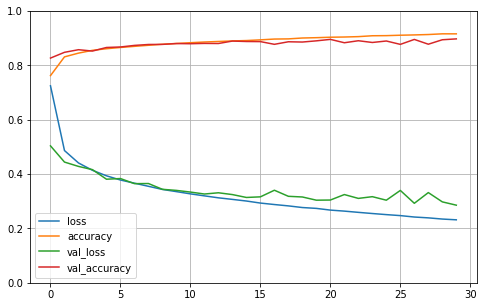

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()


In [25]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 62.8921 - accuracy: 0.8498


[62.89206314086914, 0.8497999906539917]

In [26]:
X_new = X_test[:3]

In [27]:
y_proba = model.predict(X_new)

In [28]:
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [29]:
y_pred = model.predict_classes(X_new)

/opt/conda/envs/tf2/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [30]:
y_pred

array([9, 2, 1])

In [31]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [32]:
y_new = y_test[:3]

In [33]:
y_new

array([9, 2, 1], dtype=uint8)

In [34]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [35]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3] # pretend these are new instances
y_pred = model.predict(X_new)


Epoch 1/20
363/363 [==============================] - 1s 913us/step - loss: 1.2603 - val_loss: 0.5659
Epoch 2/20
363/363 [==============================] - 0s 677us/step - loss: 0.5774 - val_loss: 0.6371
Epoch 3/20
363/363 [==============================] - 0s 697us/step - loss: 0.7008 - val_loss: 0.4757
Epoch 4/20
363/363 [==============================] - 0s 701us/step - loss: 0.4639 - val_loss: 0.4504
Epoch 5/20
363/363 [==============================] - 0s 658us/step - loss: 0.4400 - val_loss: 0.4357
Epoch 6/20
363/363 [==============================] - 0s 673us/step - loss: 0.4259 - val_loss: 0.4264
Epoch 7/20
363/363 [==============================] - 0s 676us/step - loss: 0.4145 - val_loss: 0.4144
Epoch 8/20
363/363 [==============================] - 0s 683us/step - loss: 0.4001 - val_loss: 0.4110
Epoch 9/20
363/363 [==============================] - 0s 666us/step - loss: 0.4113 - val_loss: 0.4034
Epoch 10/20
363/363 [==============================] - 0s 669us/step - loss: 0.411

In [36]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])